<h2> Nauczanie maszynowe/Ćwiczenia10

In [38]:
from IPython import display


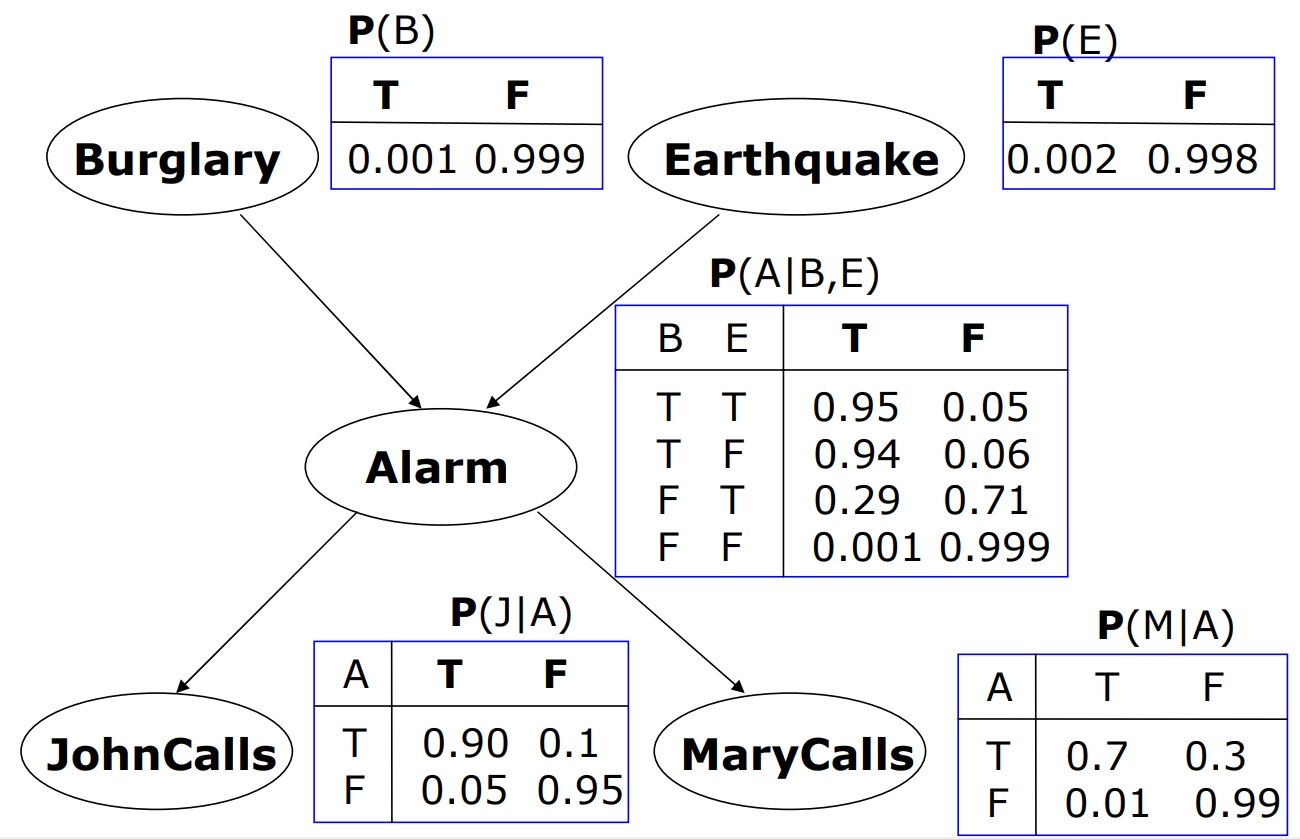v

<h4> Zadanie1: Oblicz $P(B=T, E=T, A=T, J=T, M=F)$



$P(B=T, E=T, A=T, J=T, M=F) = 0.001 * 0.002 * 0.95 * 0.9 * 0.3 = 5.13e-7$

<h4> Zadanie2: (oszędność parametrów):
    
- Ile potrzeba parametrów aby opisać rozkład łączny 5 zmiennych binarnych? 
- Ile parametrów ma powyższa sieć? 

Aby opisać 5 zmiennych binarnych w rozkładzie łącznym potrzeba by było 32 parametrów (2^5 = 32). Użycie sieci bayesowskiej do przedstawienia relacji między 5 zmiennymi binarnymi umożliwia użycie mniejszej liczby parametrów niż pełny wspólny rozkład dla wszystkich możliwych kombinacji wartości zmiennych. Powyższa sieć ma: 2 + 2 + 2x2x2 + 2x2 + 2x2 = 20 parametrów.

<h4> Zadanie3: Wykonaj analogiczne zadanie dla 10 zmiennych binarnych i następującej topologii sieci:

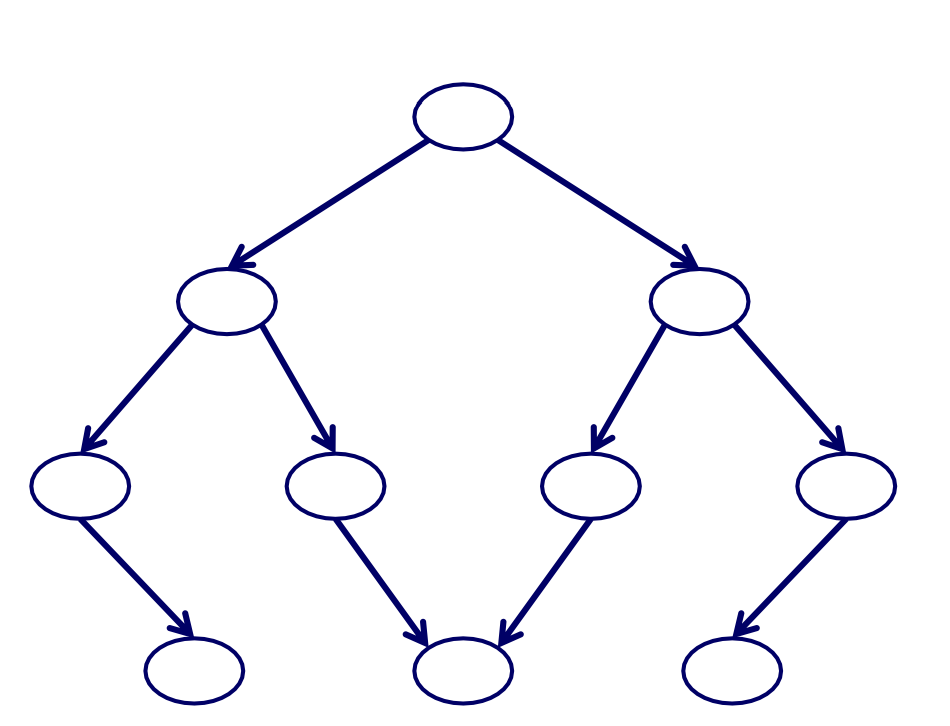

Dla 10 zmiennych binarnych mamy 2^10 = 1024 parametrów w rozkładzie łącznym. Powyższa sieć ma natomiast 2 + 2x(2x2 + 2x2 + 2x2 + 2x2) + 2x2x2 = 42 parametrów.

A teraz parę przykładów w Python

In [41]:
import pandas as pd

In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

mle_model = MaximumLikelihoodEstimator(nb_net, data) #szacowanie prawdopodobienstw za pomocą metody największej wiarygodnosci
print(mle_model.estimate_cpd('fruit'))  
print(mle_model.estimate_cpd('size')) 
print(mle_model.estimate_cpd('tasty'))  

+---------------+-----+
| fruit(apple)  | 0.5 |
+---------------+-----+
| fruit(banana) | 0.5 |
+---------------+-----+
+-------------+----------+
| size(large) | 0.714286 |
+-------------+----------+
| size(small) | 0.285714 |
+-------------+----------+
+------------+--------------+--------------------+---------------------+---------------+
| fruit      | fruit(apple) | fruit(apple)       | fruit(banana)       | fruit(banana) |
+------------+--------------+--------------------+---------------------+---------------+
| size       | size(large)  | size(small)        | size(large)         | size(small)   |
+------------+--------------+--------------------+---------------------+---------------+
| tasty(no)  | 0.25         | 0.3333333333333333 | 0.16666666666666666 | 1.0           |
+------------+--------------+--------------------+---------------------+---------------+
| tasty(yes) | 0.75         | 0.6666666666666666 | 0.8333333333333334  | 0.0           |
+------------+--------------+----

In [ ]:
from pgmpy.estimators import BayesianEstimator

est = BayesianEstimator(nb_net, data)
print(est.estimate_cpd('tasty', prior_type='K2')) #dodaje pseudozliczenia (1) zeby m.in. wyeliminowac zera

+------------+--------------------+--------------+---------------+--------------------+
| fruit      | fruit(apple)       | fruit(apple) | fruit(banana) | fruit(banana)      |
+------------+--------------------+--------------+---------------+--------------------+
| size       | size(large)        | size(small)  | size(large)   | size(small)        |
+------------+--------------------+--------------+---------------+--------------------+
| tasty(no)  | 0.3333333333333333 | 0.4          | 0.25          | 0.6666666666666666 |
+------------+--------------------+--------------+---------------+--------------------+
| tasty(yes) | 0.6666666666666666 | 0.6          | 0.75          | 0.3333333333333333 |
+------------+--------------------+--------------+---------------+--------------------+


<h4> Zadanie4: Wyjaśnij wartość 0.75 w powyższej tabeli (poprzez bezpośrednie wyliczenie i objaśnienie).

Z powyżych dwóch tabeli, wynika że:

1.   w tabeli pierwszej mamy 1/6 niesmacznych dużych bananów i 5/6 smacznych dużych bananów.
2.   następnie dodajemy po pseudozliczeniu i wtedy mamy 1/4 niesmacznnych dużych bananów i 3/4 dużych bananów.


Na początku wśród dużych bananów było 5 smacznych i 1 niesmaczny, a pseudozliczenie zmieniło ten stan na 6 smacznych i 2 niesmaczne.

6/8 = 0.75 <- stąd wartość w drugiej tabeli.




<h4> Zadanie5: Wygeneruj dane zawierające 10 tys wierszy i 3 kolumny. Pierwsze dwie kolumny (A, B) niech zawierają losowe liczby całkowite z zakresu $<-2,2>$. Trzecia kolumna (C) to kombinacja liniowa dwóch pierwszych kolumn $C = 2A-3C$. Zbuduj dwie topologie sieci, tzn. $(A ->C, B->C)$ oraz $(A->B, B->C)$. Oceń która z sieci wydaje sie lepiej odzwierciedlać strukturę danych. Wyjaśnij dlaczego.

In [ ]:
pip install pgmpy

In [11]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import BDeuScore, K2Score, BicScore



df = pd.DataFrame(np.random.randint(-2, 3, size=(10000, 2)), columns=["A", "B"])
df["C"] = 2 * df["A"] - 3 * df["B"]


model  = BayesianNetwork([("A", "C"), ("B", "C")])
model2 = BayesianNetwork([('A', 'B'), ('B', 'C')])


model.fit(df, estimator=BayesianEstimator, prior_type="BDeu")
model2.fit(df, estimator=BayesianEstimator, prior_type="BDeu")


bdeu = BDeuScore(df)
k2 = K2Score(df)
bic = BicScore(df)

print("(𝐴−>𝐶,𝐵−>𝐶)")
print(bdeu.score(model))
print(k2.score(model))
print(bic.score(model))
print("(𝐴−>𝐵,𝐵−>𝐶)")
print(bdeu.score(model2))
print(k2.score(model2))
print(bic.score(model2))


(𝐴−>𝐶,𝐵−>𝐶)
-32345.205775509126
-34011.334332146514
-34293.29511354286
(𝐴−>𝐵,𝐵−>𝐶)
-48490.59950266712
-48756.08082317604
-48775.33458962641


Lepiej opisuje topologia (𝐴−>𝐶,𝐵−>𝐶), wskazują na to wyższe warosści dla bdeu, k2 i bic score. Spodziewamy się takiego wyniku, ponieważ kolumna C jest kombinacją kolumn A i B, a topologia ta dokładnie to opisuje.

<h4> Zadanie6: Liczba możliwych topologii sieci dla $n$ cech wyraża się następującyc wzorem rekurencyjnym
   

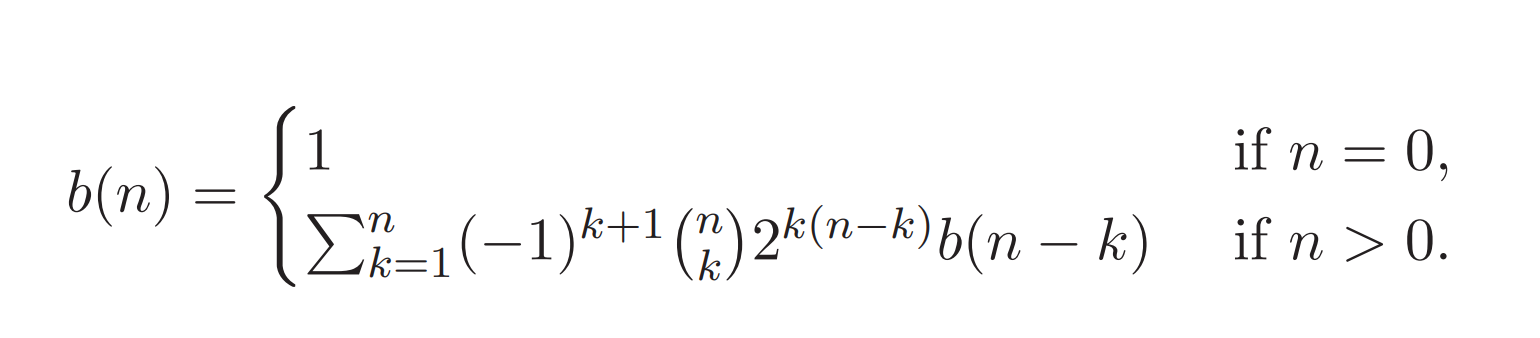

In [ ]:
display.Image("bay.png", width="500", height="500")

<h4> Zaimplementuj ten wzór oraz sprawdź go dla 3 cech (przyklad wyżej). Ile możliwych sieci występuje dla 10 cech?

In [46]:
import math as m

In [64]:
def no_topologies(n):
  if (n == 0):
    return 1
  else :
    b_n = 0
    for element in range (1,n+1):
      b_n += pow(-1,element + 1) * m.factorial(n) / (m.factorial(element) * m.factorial(n-element))  * pow(2, element * (n - element)) * no_topologies(n-element)
    return(b_n)

In [65]:
how_many = no_topologies(3)
print(how_many)

25.0


In [66]:
how_many = no_topologies(10)
print(how_many)

4.175098976430598e+18
